In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename));

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar10-python/cifar-10-python.tar.gz
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_1
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar10-python/cifar-10-batches-py/batches.meta
/kaggle/input/cifar10-python/cifar-10-batches-py/test_batch
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_3
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_5
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_4
/kaggle/input/cifar10-python/cifar-10-batches-py/readme.html
/kaggle/input/cifar10/data_batch_1
/kaggle/input/cifar10/data_batch_2
/kaggle/input/cifar10/test_batch
/kaggle/input/cifar10/data_batch_3
/kaggle/input/cifar10/data_batch_5
/kaggle/input/cifar10/data_batch_4


In [16]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, DenseNet121
from tensorflow.keras.layers import Input,Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


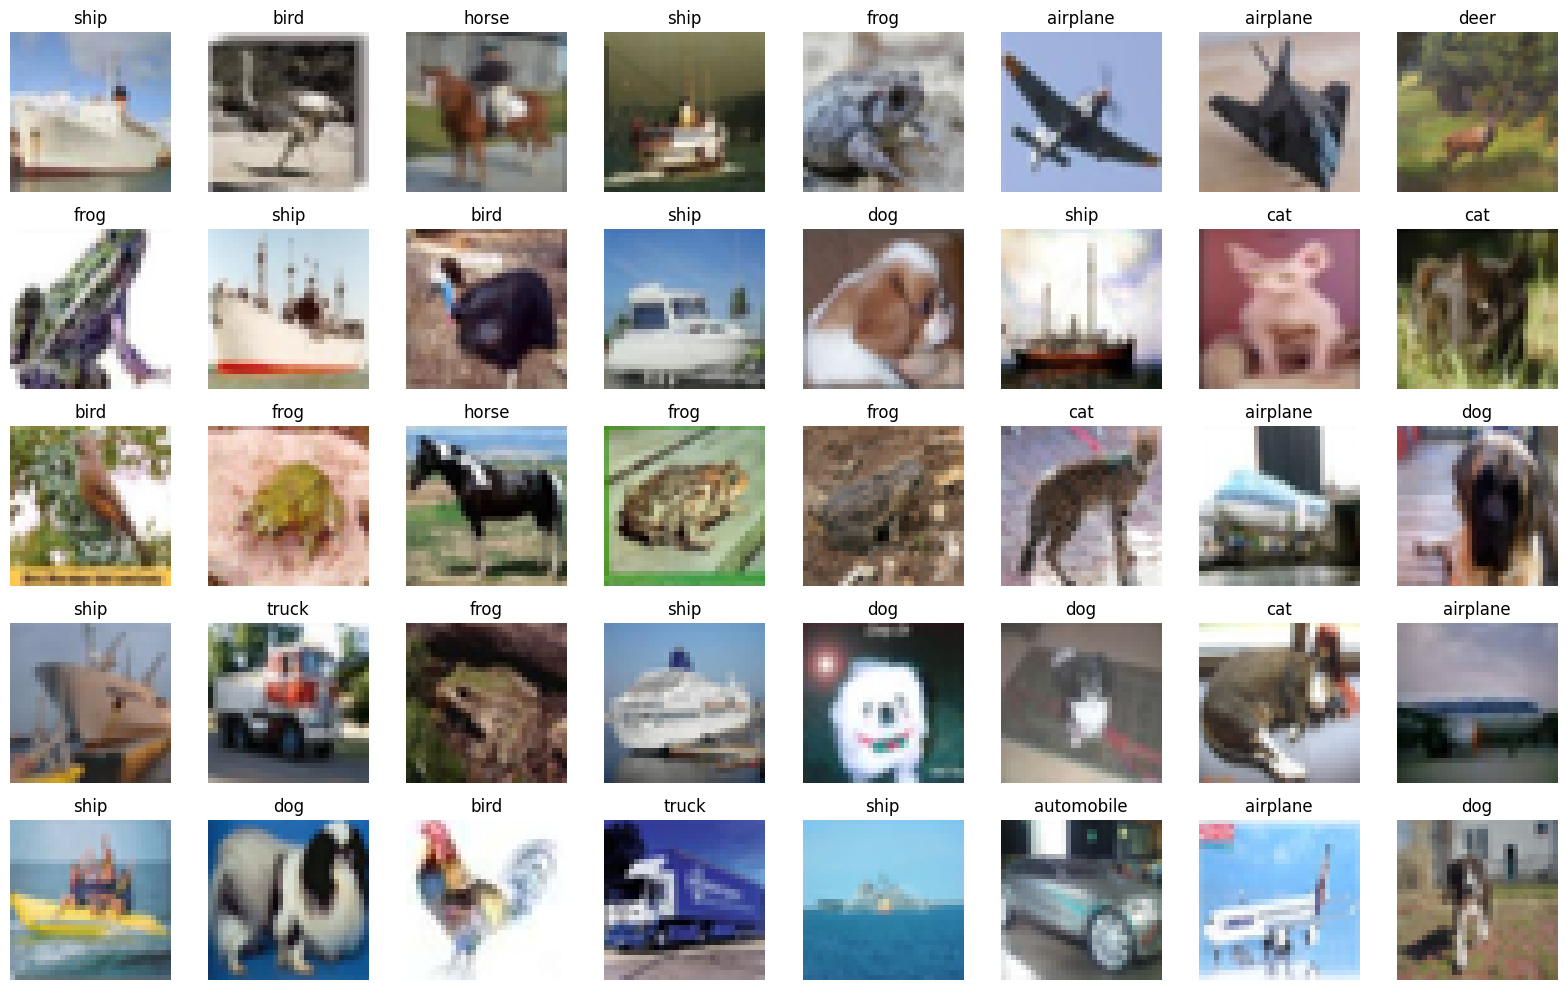

In [18]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
random_numbers = np.random.randint(1, len(X_train), 40)

fig, axes = plt.subplots(5, 8, figsize=(16, 10))

for i, ax in enumerate(axes.flat):
    n = random_numbers[i]
    image = X_train[n]
    label = labels[int(y_train[n])]

    ax.imshow(image)
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

<BarContainer object of 10 artists>

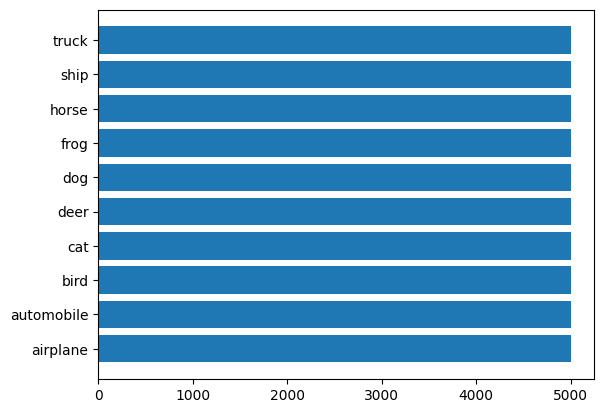

In [19]:
classname,counts=np.unique(y_train,return_counts=True)
plt.barh(labels,counts)

### **classes are equally distributed**

### **now we normalize trainning data and encoding test data** 

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0


y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

## **pre trained models**

In [22]:
def create_finetuned_model(base_model, num_classes):
    model = Sequential([
        base_model,
        Flatten(),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [23]:
# Load pretrained models
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
densenet121_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

29084464/29084464 [==============================] - 1s 0us/step


In [24]:
num_classes = 10  # CIFAR-10 has 10 classes
vgg16_model = create_finetuned_model(vgg16_base, num_classes)
resnet50_model = create_finetuned_model(resnet50_base, num_classes)
densenet121_model = create_finetuned_model(densenet121_base, num_classes)

In [25]:
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[ 'accuracy'])
# Train models
vgg_history=vgg16_model.fit(X_train, y_cat_train,batch_size=64, epochs=20, validation_data=(X_test, y_cat_test))


Epoch 1/20
782/782 [==============================] - 32s 24ms/step - loss: 1.9020 - accuracy: 0.2372 - val_loss: 1.7195 - val_accuracy: 0.3403
Epoch 2/20
782/782 [==============================] - 17s 22ms/step - loss: 1.4875 - accuracy: 0.4249 - val_loss: 1.3092 - val_accuracy: 0.5082
Epoch 3/20
782/782 [==============================] - 17s 22ms/step - loss: 1.2200 - accuracy: 0.5536 - val_loss: 1.1306 - val_accuracy: 0.5975
Epoch 4/20
782/782 [==============================] - 17s 22ms/step - loss: 1.0624 - accuracy: 0.6250 - val_loss: 1.0279 - val_accuracy: 0.6421
Epoch 5/20
782/782 [==============================] - 17s 22ms/step - loss: 0.9349 - accuracy: 0.6733 - val_loss: 0.9882 - val_accuracy: 0.6656
Epoch 6/20
782/782 [==============================] - 17s 22ms/step - loss: 0.8611 - accuracy: 0.7065 - val_loss: 0.9976 - val_accuracy: 0.6790
Epoch 7/20
782/782 [==============================] - 17s 22ms/step - loss: 0.8341 - accuracy: 0.7142 - val_loss: 0.9049 - val_accuracy:

In [26]:
resnet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[ 'accuracy'])
resnet_history=resnet50_model.fit(X_train, y_cat_train, epochs=20,batch_size= 64, validation_data=(X_test, y_cat_test))

Epoch 1/20
782/782 [==============================] - 73s 44ms/step - loss: 1.1972 - accuracy: 0.6032 - val_loss: 2.3614 - val_accuracy: 0.3339
Epoch 2/20
782/782 [==============================] - 33s 42ms/step - loss: 0.8190 - accuracy: 0.7322 - val_loss: 0.8458 - val_accuracy: 0.7284
Epoch 3/20
782/782 [==============================] - 33s 43ms/step - loss: 0.6742 - accuracy: 0.7816 - val_loss: 0.8467 - val_accuracy: 0.7204
Epoch 4/20
782/782 [==============================] - 32s 41ms/step - loss: 0.5763 - accuracy: 0.8119 - val_loss: 0.9808 - val_accuracy: 0.6939
Epoch 5/20
782/782 [==============================] - 32s 41ms/step - loss: 0.5046 - accuracy: 0.8359 - val_loss: 0.8572 - val_accuracy: 0.7432
Epoch 6/20
782/782 [==============================] - 33s 42ms/step - loss: 0.4566 - accuracy: 0.8506 - val_loss: 0.8224 - val_accuracy: 0.7366
Epoch 7/20
782/782 [==============================] - 32s 41ms/step - loss: 0.4938 - accuracy: 0.8389 - val_loss: 0.6900 - val_accuracy:

In [27]:
densenet121_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[ 'accuracy'])
densenet_history=densenet121_model.fit(X_train, y_cat_train, epochs=20,batch_size= 64, validation_data=(X_test, y_cat_test))

Epoch 1/20
782/782 [==============================] - 121s 68ms/step - loss: 0.9680 - accuracy: 0.6775 - val_loss: 0.9500 - val_accuracy: 0.6767
Epoch 2/20
782/782 [==============================] - 50s 64ms/step - loss: 0.6615 - accuracy: 0.7810 - val_loss: 1.1258 - val_accuracy: 0.6196
Epoch 3/20
782/782 [==============================] - 50s 64ms/step - loss: 0.5582 - accuracy: 0.8130 - val_loss: 0.7420 - val_accuracy: 0.7496
Epoch 4/20
782/782 [==============================] - 50s 64ms/step - loss: 0.4270 - accuracy: 0.8565 - val_loss: 0.6037 - val_accuracy: 0.7934
Epoch 5/20
782/782 [==============================] - 50s 64ms/step - loss: 0.3958 - accuracy: 0.8678 - val_loss: 0.6823 - val_accuracy: 0.7910
Epoch 6/20
782/782 [==============================] - 50s 64ms/step - loss: 0.3428 - accuracy: 0.8852 - val_loss: 0.7153 - val_accuracy: 0.7769
Epoch 7/20
782/782 [==============================] - 50s 64ms/step - loss: 0.3073 - accuracy: 0.8957 - val_loss: 0.6537 - val_accuracy

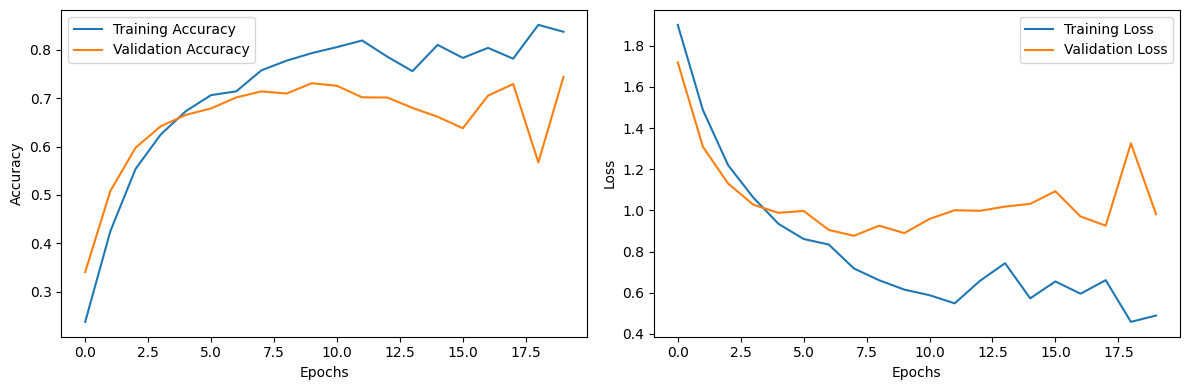

In [38]:
#vgg history plot
training_accuracy = vgg_history.history['accuracy']
validation_accuracy = vgg_history.history['val_accuracy']
training_loss = vgg_history.history['loss']
validation_loss = vgg_history.history['val_loss']

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

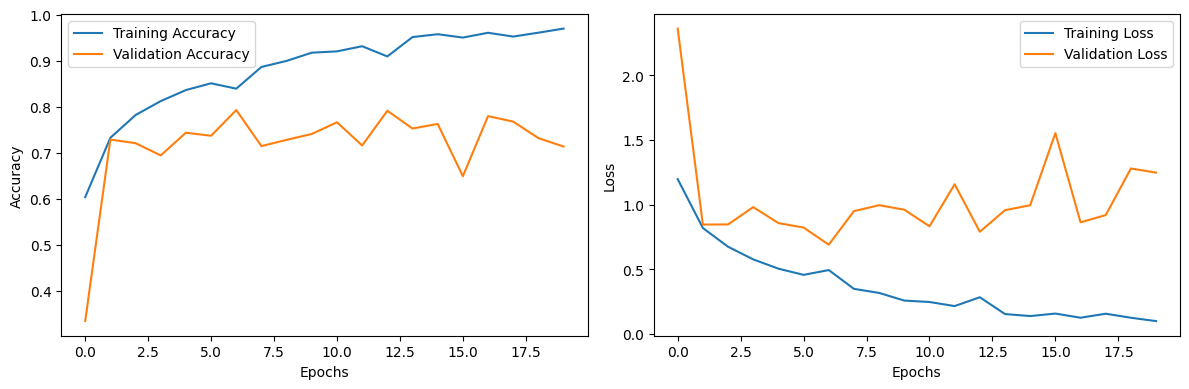

In [39]:
#resnet history plot
training_accuracy = resnet_history.history['accuracy']
validation_accuracy = resnet_history.history['val_accuracy']
training_loss = resnet_history.history['loss']
validation_loss = resnet_history.history['val_loss']

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

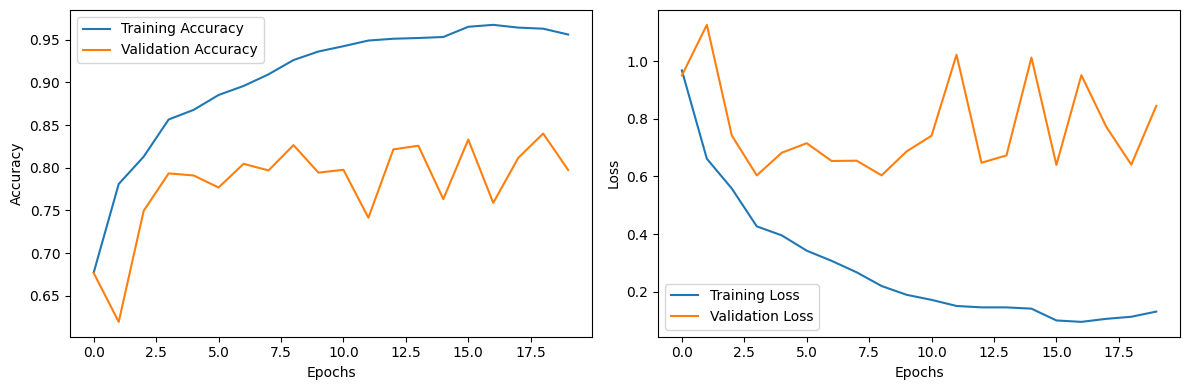

In [40]:
#densenet history plot
training_accuracy = densenet_history.history['accuracy']
validation_accuracy = densenet_history.history['val_accuracy']
training_loss = densenet_history.history['loss']
validation_loss = densenet_history.history['val_loss']

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()